In [3]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from random import randint
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset
df = pd.read_csv('Dataset-Mental-Disorders.csv')

In [5]:
# show the dataset
df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [6]:
# shape of the data
df.shape

(120, 19)

In [7]:
# check the duplicated
df.duplicated().sum()

np.int64(0)

In [8]:
# check the missing values
df.isnull().sum()

,0
Patient Number,0
Sadness,0
Euphoric,0
Exhausted,0
Sleep dissorder,0
Mood Swing,0
Suicidal thoughts,0
Anorxia,0
Authority Respect,0
Try-Explanation,0


In [9]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [10]:
# remove the patient number
df.drop('Patient Number',axis=1,inplace=True)

In [11]:
df.shape

(120, 18)

In [12]:
# levels in each category
categorical_colmns = df.select_dtypes(include='object').columns
categorical_colmns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [13]:
for i in categorical_colmns:
    print(df[i].value_counts())

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64
Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64
Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64
Sleep dissorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64
Mood Swing
NO     63
YES    57
Name: count, dtype: int64
Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64
Anorxia
NO     74
YES    46
Name: count, dtype: int64
Authority Respect
NO     73
YES    47
Name: count, dtype: int64
Try-Explanation
NO     63
YES    57
Name: count, dtype: int64
Aggressive Response
NO     62
YES    58
Name: count, dtype: int64
Ignore & Move-On
NO     70
YES    50
Name: count, dtype: int64
Nervous Break-down
YES    62
NO     58
Name: count, dtype: int64
Admit Mistakes
NO     61
YES    59
Name: count, dtype: int64
Overthinking

In [14]:
# Suicidal thoughts has 3 levels "NO' "YES" and "Yes "
df["Suicidal thoughts"] = df["Suicidal thoughts"].str.strip().str.upper()

In [15]:
#yes_responses = df[df['Suicidal thoughts']=="YES"]
#len(yes_responses)
df["Suicidal thoughts"].value_counts()

,count
Suicidal thoughts,
NO,63
YES,57


In [16]:
# order the levels
categories = ['Seldom','Sometimes','Usually','Most-Often']

ordinal_encoder = OrdinalEncoder(categories=[categories])

df['Sadness'] = ordinal_encoder.fit_transform(df[['Sadness']])
df['Euphoric'] = ordinal_encoder.fit_transform(df[['Euphoric']])
df['Exhausted'] = ordinal_encoder.fit_transform(df[['Exhausted']])
df['Sleep dissorder'] = ordinal_encoder.fit_transform(df[['Sleep dissorder']])


In [17]:
# convert the data type to numeric
df['Sexual Activity'] = df['Sexual Activity'].str.extract('(\d+)').astype('Int64').astype('int64')
df['Concentration'] = df['Concentration'].str.extract('(\d+)').astype('Int64').astype('int64')
df['Optimisim'] = df['Optimisim'].str.extract('(\d+)').astype('Int64').astype('int64')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sadness              120 non-null    float64
 1   Euphoric             120 non-null    float64
 2   Exhausted            120 non-null    float64
 3   Sleep dissorder      120 non-null    float64
 4   Mood Swing           120 non-null    object 
 5   Suicidal thoughts    120 non-null    object 
 6   Anorxia              120 non-null    object 
 7   Authority Respect    120 non-null    object 
 8   Try-Explanation      120 non-null    object 
 9   Aggressive Response  120 non-null    object 
 10  Ignore & Move-On     120 non-null    object 
 11  Nervous Break-down   120 non-null    object 
 12  Admit Mistakes       120 non-null    object 
 13  Overthinking         120 non-null    object 
 14  Sexual Activity      120 non-null    int64  
 15  Concentration        120 non-null    int

In [19]:
classes = df['Expert Diagnose']
df = df.drop('Expert Diagnose',axis=1)

In [20]:
# One-hot encode remaining object columns
remaining_categorical_colmns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df,remaining_categorical_colmns, drop_first=True)



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sadness                  120 non-null    float64
 1   Euphoric                 120 non-null    float64
 2   Exhausted                120 non-null    float64
 3   Sleep dissorder          120 non-null    float64
 4   Sexual Activity          120 non-null    int64  
 5   Concentration            120 non-null    int64  
 6   Optimisim                120 non-null    int64  
 7   Mood Swing_YES           120 non-null    bool   
 8   Suicidal thoughts_YES    120 non-null    bool   
 9   Anorxia_YES              120 non-null    bool   
 10  Authority Respect_YES    120 non-null    bool   
 11  Try-Explanation_YES      120 non-null    bool   
 12  Aggressive Response_YES  120 non-null    bool   
 13  Ignore & Move-On_YES     120 non-null    bool   
 14  Nervous Break-down_YES   1

In [22]:
df = pd.concat([df,classes],axis=1)

In [23]:
X = df.drop('Expert Diagnose',axis=1)
y = df['Expert Diagnose']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,                # 30% for testing
    stratify=y,                   # Maintain class distribution
    random_state=42               # For reproducibility
)

In [25]:
X_train.shape

(84, 17)

In [26]:
# Specify feature types
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns
continuous_features = X.select_dtypes(include=['float64','int64']).columns      # Continuous columns

In [27]:
X_test1 = X_test.copy()
X_test1

,Sadness,Euphoric,Exhausted,Sleep dissorder,Sexual Activity,Concentration,Optimisim,Mood Swing_YES,Suicidal thoughts_YES,Anorxia_YES,Authority Respect_YES,Try-Explanation_YES,Aggressive Response_YES,Ignore & Move-On_YES,Nervous Break-down_YES,Admit Mistakes_YES,Overthinking_YES
45,3.0,1.0,2.0,1.0,4,4,4,True,False,False,True,False,False,True,True,True,False
84,2.0,0.0,0.0,1.0,7,6,7,True,False,False,False,False,True,True,True,False,False
48,0.0,2.0,2.0,2.0,5,4,6,True,True,False,False,False,False,False,True,False,False
108,2.0,1.0,1.0,1.0,2,1,1,True,True,True,True,False,True,True,True,False,True
60,2.0,1.0,2.0,2.0,4,4,3,True,True,False,False,False,True,True,False,True,True
42,0.0,1.0,1.0,0.0,4,4,6,True,False,False,True,False,False,True,False,True,True
70,1.0,0.0,2.0,1.0,2,6,2,False,True,False,False,False,True,True,True,True,True
54,3.0,0.0,3.0,3.0,2,2,1,True,True,True,False,False,True,False,True,True,True
58,1.0,1.0,3.0,2.0,3,7,4,False,False,True,True,False,False,False,True,True,True
104,2.0,1.0,3.0,2.0,2,4,4,True,True,True,False,False,False,True,True,False,False


In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

feature_names = X_train.columns

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

In [29]:
X_train

,Sadness,Euphoric,Exhausted,Sleep dissorder,Sexual Activity,Concentration,Optimisim,Mood Swing_YES,Suicidal thoughts_YES,Anorxia_YES,Authority Respect_YES,Try-Explanation_YES,Aggressive Response_YES,Ignore & Move-On_YES,Nervous Break-down_YES,Admit Mistakes_YES,Overthinking_YES
0,0.448879,0.063119,-0.611055,0.538454,-0.453887,-0.144717,-0.790780,1.074172,-0.953463,-0.824621,-0.784465,-1.0,-0.908893,-0.845154,1.0,1.074172,0.887262
1,-0.598506,-0.997287,0.357410,-1.386233,-0.453887,0.383815,0.223350,-0.930949,-0.953463,-0.824621,1.274755,-1.0,-0.908893,1.183216,-1.0,1.074172,-1.127063
2,1.496264,-0.997287,1.325874,-0.423890,-1.431491,1.969411,-0.283715,-0.930949,1.048809,-0.824621,-0.784465,-1.0,-0.908893,-0.845154,-1.0,-0.930949,0.887262
3,0.448879,-0.997287,1.325874,-0.423890,-0.942689,0.383815,-1.297845,-0.930949,1.048809,-0.824621,-0.784465,-1.0,-0.908893,-0.845154,-1.0,1.074172,0.887262
4,-0.598506,0.063119,-0.611055,-1.386233,0.034914,0.383815,0.223350,-0.930949,1.048809,-0.824621,1.274755,-1.0,-0.908893,1.183216,-1.0,1.074172,-1.127063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.598506,2.183933,-0.611055,-1.386233,0.523716,-1.201781,0.730415,-0.930949,-0.953463,-0.824621,1.274755,-1.0,-0.908893,-0.845154,-1.0,1.074172,0.887262
80,-1.645890,0.063119,-1.579520,-1.386233,0.034914,1.440879,1.744544,-0.930949,-0.953463,-0.824621,1.274755,-1.0,-0.908893,-0.845154,-1.0,1.074172,-1.127063
81,-1.645890,2.183933,-0.611055,0.538454,0.523716,0.912347,1.237480,-0.930949,-0.953463,1.212678,1.274755,-1.0,1.100239,-0.845154,1.0,-0.930949,0.887262
82,1.496264,-0.997287,0.357410,1.500798,-0.453887,-0.673249,0.730415,1.074172,1.048809,-0.824621,-0.784465,1.0,-0.908893,1.183216,-1.0,1.074172,-1.127063


In [30]:
X_train.shape

(84, 17)

# Support Vector Machine

In [31]:
# SVM model
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'kernel': ['linear','poly','rbf'],
    'C':[0.1,.4,.6,1,2,10,100,200],
    'gamma': [1, 0.1, 0.01, 0.001]
}
# Use K-Fold CV inside GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV (this runs 5-fold CV on training set only)
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit on training data only
grid_search.fit(X_train, y_train)

# Best found parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [32]:
# Train final model using the best parameters
svm_new = SVC(**grid_search.best_params_)
svm_new.fit(X_train,y_train)

# Predict on test set
y_pred = svm_new.predict(X_train)

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = svm_new.predict(X_test)
print(classification_report(y_test, y_pred))


Train Accuracy: 0.976
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.89      0.94         9
Bipolar Type-2       1.00      1.00      1.00         9
    Depression       0.73      0.89      0.80         9
        Normal       0.75      0.67      0.71         9

      accuracy                           0.86        36
     macro avg       0.87      0.86      0.86        36
  weighted avg       0.87      0.86      0.86        36



# Random Forest

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],               # Number of trees in the forest
    'max_depth': [None, 30, 50, 70],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum number of samples to split a node
    'min_samples_leaf': [1, 4, 10],                # Minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2']               # Number of features to consider at each split
}

# Use K-Fold CV inside GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV (this runs 5-fold CV on training set only)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [34]:
# Train final model using the best parameters
rf_new = RandomForestClassifier(**grid_search.best_params_)
rf_new.fit(X_train,y_train)

# Predict on test set
y_pred = rf_new.predict(X_train)

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = rf_new.predict(X_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.964
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       0.89      0.89      0.89         9
Bipolar Type-2       0.89      0.89      0.89         9
    Depression       0.82      1.00      0.90         9
        Normal       0.86      0.67      0.75         9

      accuracy                           0.86        36
     macro avg       0.86      0.86      0.86        36
  weighted avg       0.86      0.86      0.86        36



## Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Prevents zero variance
}

# Use K-Fold CV inside GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV (this runs 5-fold CV on training set only)
grid_search = GridSearchCV(nb, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'var_smoothing': 1e-08}


In [36]:
# Train final model using the best parameters
nb_new = GaussianNB(**grid_search.best_params_)
nb_new.fit(X_train,y_train)

# Predict on test set
y_pred = nb_new.predict(X_train)

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = nb_new.predict(X_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.845
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.11      0.20         9
Bipolar Type-2       0.53      1.00      0.69         9
    Depression       0.75      1.00      0.86         9
        Normal       0.83      0.56      0.67         9

      accuracy                           0.67        36
     macro avg       0.78      0.67      0.60        36
  weighted avg       0.78      0.67      0.60        36



## KNN

In [37]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 21)),        # Try neighbors from 1 to 20
    'weights': ['uniform', 'distance'],        # Uniform or weighted voting
    'metric': ['euclidean', 'manhattan']       # Distance metrics to try
}

# Use K-Fold CV inside GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV (this runs 5-fold CV on training set only)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}


In [38]:
# Train final model using the best parameters
knn_new = KNeighborsClassifier(**grid_search.best_params_)
knn_new.fit(X_train,y_train)

# Predict on test set
y_pred = knn_new.predict(X_train)

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = knn_new.predict(X_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 1.000
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.56      0.71         9
Bipolar Type-2       0.80      0.89      0.84         9
    Depression       0.69      1.00      0.82         9
        Normal       0.75      0.67      0.71         9

      accuracy                           0.78        36
     macro avg       0.81      0.78      0.77        36
  weighted avg       0.81      0.78      0.77        36



## Ada Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],

}

# Use K-Fold CV inside GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV (this runs 5-fold CV on training set only)
grid_search = GridSearchCV(ada, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 1, 'n_estimators': 100}


In [40]:
# Train final model using the best parameters
ada_new = AdaBoostClassifier(**grid_search.best_params_)
ada_new.fit(X_train,y_train)

# Predict on test set
y_pred = ada_new.predict(X_train)

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = ada_new.predict(X_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.952
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       0.89      0.89      0.89         9
Bipolar Type-2       0.89      0.89      0.89         9
    Depression       0.70      0.78      0.74         9
        Normal       0.62      0.56      0.59         9

      accuracy                           0.78        36
     macro avg       0.78      0.78      0.78        36
  weighted avg       0.78      0.78      0.78        36



### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}


# Set up stratified k-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=cv,
                         scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best parameters: {'C': 0.1, 'class_weight': None, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8934


In [42]:
# Train final model using the best parameters
lg_new = LogisticRegression(**grid_search.best_params_)
lg_new.fit(X_train,y_train)

# Predict on test set
y_pred = lg_new.predict(X_train)

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = lg_new.predict(X_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.964
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.67      0.80         9
Bipolar Type-2       0.90      1.00      0.95         9
    Depression       0.80      0.89      0.84         9
        Normal       0.70      0.78      0.74         9

      accuracy                           0.83        36
     macro avg       0.85      0.83      0.83        36
  weighted avg       0.85      0.83      0.83        36



## Bagging with Models(Weak)

## Bagging + SVM

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV


# Base SVC (no need to set parameters here, will be set via GridSearch)
base_svc = SVC()

# Bagging Classifier with placeholder estimator
bag_svm = BaggingClassifier(estimator=base_svc, random_state=42)

# Grid of parameters
param_grid = {
    'estimator__C': [2,5,10],
    'estimator__gamma': [0.01,0.1],
    'estimator__kernel': ['rbf'],
    'n_estimators': [150],
    'max_samples': [0.3,0.35,0.4],
    'bootstrap': [True]
}
# Use K-Fold CV inside GridSearchCV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid Search
search = RandomizedSearchCV(bag_svm, param_distributions=param_grid,
                            n_iter=30, cv=cv, scoring='accuracy',
                            random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", search.best_params_)


Best parameters: {'n_estimators': 150, 'max_samples': 0.4, 'estimator__kernel': 'rbf', 'estimator__gamma': 0.01, 'estimator__C': 5, 'bootstrap': True}


In [44]:
# This is already trained on the training data
bag_svm_new = search.best_estimator_
# Evaluate on train
train_accuracy = accuracy_score(y_train, bag_svm_new.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.3f}")

# Evaluate on test
y_pred = bag_svm_new.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.964
Test Accuracy: 0.8611111111111112
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.89      0.94         9
Bipolar Type-2       1.00      1.00      1.00         9
    Depression       0.73      0.89      0.80         9
        Normal       0.75      0.67      0.71         9

      accuracy                           0.86        36
     macro avg       0.87      0.86      0.86        36
  weighted avg       0.87      0.86      0.86        36



In [45]:
from sklearn.ensemble import BaggingClassifier

bag_nb = BaggingClassifier(estimator=GaussianNB(var_smoothing=1e-06),n_estimators=200,bootstrap=True, random_state=42)

bag_nb.fit(X_train, y_train)


BaggingClassifier(estimator=GaussianNB(var_smoothing=1e-06), n_estimators=200,
                  random_state=42)

In [46]:
y_pred_bagg = bag_nb.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_bagg))

                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.44      0.62         9
Bipolar Type-2       0.64      1.00      0.78         9
    Depression       0.73      0.89      0.80         9
        Normal       0.71      0.56      0.62         9

      accuracy                           0.72        36
     macro avg       0.77      0.72      0.71        36
  weighted avg       0.77      0.72      0.71        36



# Best Model  : Random Forest

### Confusion Matrix

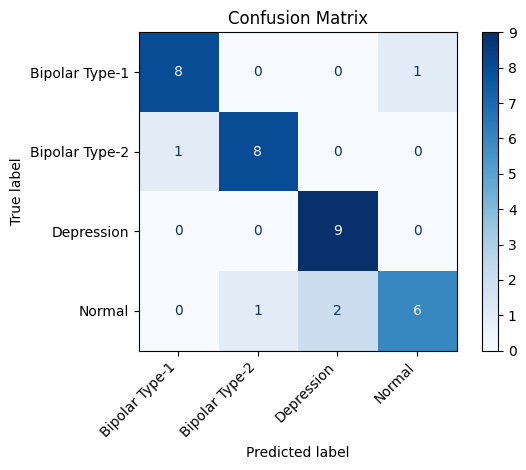

In [48]:
import matplotlib.pyplot as plt
from sklearn import metrics

predicted = rf_new.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

class_labels = ["Bipolar Type-1", "Bipolar Type-2", "Depression", "Normal"]

# Plot with custom labels
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=class_labels
)

cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix")

# Rotate x-axis labels (adjust angle as needed)
plt.xticks(rotation=45, ha='right')  # 'ha' aligns labels properly after rotation

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

## Feature Importance

In [49]:
import shap
# Create a TreeExplainer
explainer = shap.TreeExplainer(rf_new)
shap_values = explainer.shap_values(X_test)
shap.initjs()  # Initialize JS visualization (though you're using matplotlib=True)


In [50]:
shap_values.shape

(36, 17, 4)

In [51]:
rf_new.classes_

array(['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'],
      dtype=object)

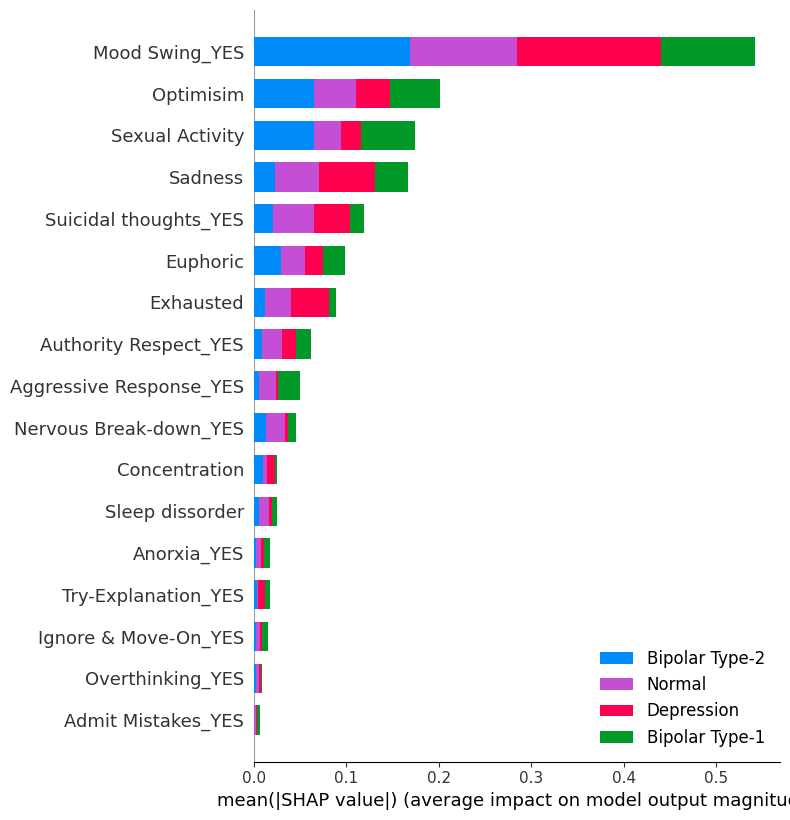

In [52]:

shap.summary_plot(shap_values,X_test1,plot_type="bar",class_names=rf_new.classes_)


In [53]:
shap_values = np.array(shap_values)  # Convert to numpy array if it's a list
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

# Calculate mean importance for each feature across all samples
feature_importance = pd.DataFrame({
    'feature': X_test1.columns,
    'importance': np.mean(mean_abs_shap, axis=1)  # Column-wise mean
}).sort_values('importance', ascending=False)

top_features = feature_importance.head(7)['feature'].tolist()

In [54]:
top_features

['Mood Swing_YES',
 'Optimisim',
 'Sexual Activity',
 'Sadness',
 'Suicidal thoughts_YES',
 'Euphoric',
 'Exhausted']

In [55]:
X_train[top_features]

,Mood Swing_YES,Optimisim,Sexual Activity,Sadness,Suicidal thoughts_YES,Euphoric,Exhausted
0,1.074172,-0.790780,-0.453887,0.448879,-0.953463,0.063119,-0.611055
1,-0.930949,0.223350,-0.453887,-0.598506,-0.953463,-0.997287,0.357410
2,-0.930949,-0.283715,-1.431491,1.496264,1.048809,-0.997287,1.325874
3,-0.930949,-1.297845,-0.942689,0.448879,1.048809,-0.997287,1.325874
4,-0.930949,0.223350,0.034914,-0.598506,1.048809,0.063119,-0.611055
...,...,...,...,...,...,...,...
79,-0.930949,0.730415,0.523716,-0.598506,-0.953463,2.183933,-0.611055
80,-0.930949,1.744544,0.034914,-1.645890,-0.953463,0.063119,-1.579520
81,-0.930949,1.237480,0.523716,-1.645890,-0.953463,2.183933,-0.611055
82,1.074172,0.730415,-0.453887,1.496264,1.048809,-0.997287,0.357410


### Random Forest Best Model (After removing unimportant variables)

In [56]:
rf_best = RandomForestClassifier(max_depth=60,max_features='sqrt',min_samples_leaf=10,min_samples_split=15,n_estimators=100)

rf_best.fit(X_train[top_features],y_train)

# Predict on test set
y_pred = rf_best.predict(X_train[top_features])

# Evaluate
training_accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {training_accuracy:.3f}")

print(f'Test Accuracy')

y_pred = rf_best.predict(X_test[top_features])
print(classification_report(y_test, y_pred))

Train Accuracy: 0.929
Test Accuracy
                precision    recall  f1-score   support

Bipolar Type-1       0.80      0.89      0.84         9
Bipolar Type-2       1.00      0.89      0.94         9
    Depression       0.82      1.00      0.90         9
        Normal       0.86      0.67      0.75         9

      accuracy                           0.86        36
     macro avg       0.87      0.86      0.86        36
  weighted avg       0.87      0.86      0.86        36



In [57]:
import shap
# Create a TreeExplainer
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_test[top_features])
shap.initjs()  # Initialize JS visualization (though you're using matplotlib=True)



SHAP Summary Plot for Class Bipolar Type-1


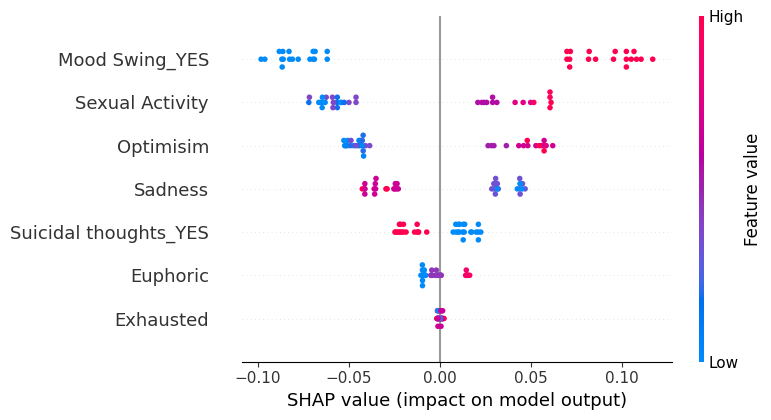


SHAP Summary Plot for Class Bipolar Type-2


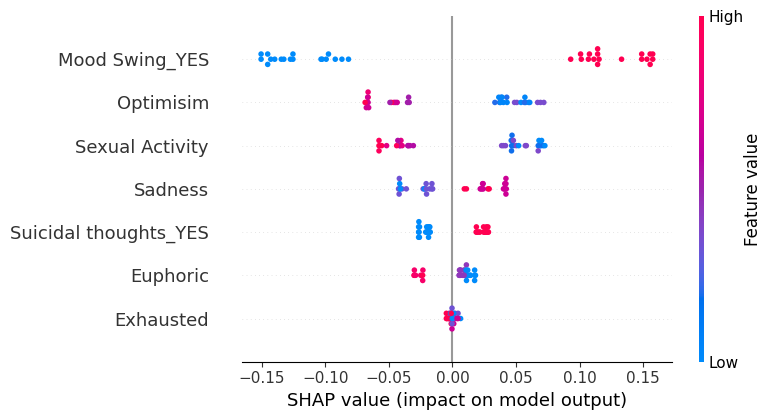


SHAP Summary Plot for Class Depression


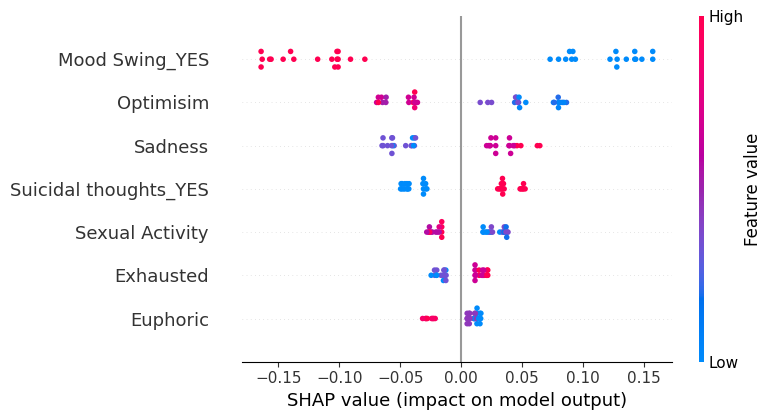


SHAP Summary Plot for Class Normal


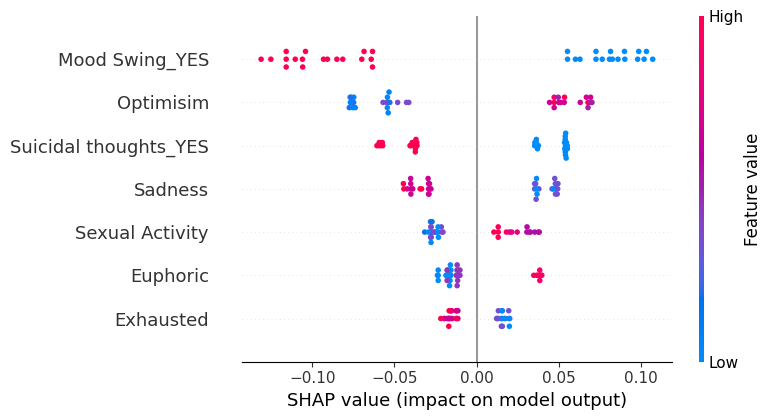

In [58]:
class_names = rf_best.classes_  # for scikit-learn classifiers
# Or: class_names = ['setosa', 'versicolor', 'virginica', 'unknown']

for class_idx, class_label in enumerate(class_names):
    print(f"\nSHAP Summary Plot for Class {class_label}")
    shap.summary_plot(
        shap_values[:, :, class_idx],
        features=X_test[top_features],
        feature_names=X_test[top_features].columns,
        show=True
    )



In [59]:
explainer.expected_value

array([0.22583333, 0.26309524, 0.26190476, 0.24916667])

In [60]:
class_names=rf_best.classes_
class_names

array(['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'],
      dtype=object)

In [61]:
X_test1

,Sadness,Euphoric,Exhausted,Sleep dissorder,Sexual Activity,Concentration,Optimisim,Mood Swing_YES,Suicidal thoughts_YES,Anorxia_YES,Authority Respect_YES,Try-Explanation_YES,Aggressive Response_YES,Ignore & Move-On_YES,Nervous Break-down_YES,Admit Mistakes_YES,Overthinking_YES
45,3.0,1.0,2.0,1.0,4,4,4,True,False,False,True,False,False,True,True,True,False
84,2.0,0.0,0.0,1.0,7,6,7,True,False,False,False,False,True,True,True,False,False
48,0.0,2.0,2.0,2.0,5,4,6,True,True,False,False,False,False,False,True,False,False
108,2.0,1.0,1.0,1.0,2,1,1,True,True,True,True,False,True,True,True,False,True
60,2.0,1.0,2.0,2.0,4,4,3,True,True,False,False,False,True,True,False,True,True
42,0.0,1.0,1.0,0.0,4,4,6,True,False,False,True,False,False,True,False,True,True
70,1.0,0.0,2.0,1.0,2,6,2,False,True,False,False,False,True,True,True,True,True
54,3.0,0.0,3.0,3.0,2,2,1,True,True,True,False,False,True,False,True,True,True
58,1.0,1.0,3.0,2.0,3,7,4,False,False,True,True,False,False,False,True,True,True
104,2.0,1.0,3.0,2.0,2,4,4,True,True,True,False,False,False,True,True,False,False


In [62]:
y_test

,Expert Diagnose
45,Bipolar Type-2
84,Bipolar Type-1
48,Bipolar Type-1
108,Bipolar Type-2
60,Bipolar Type-2
42,Normal
70,Depression
54,Bipolar Type-2
58,Depression
104,Bipolar Type-2


In [63]:
y

,Expert Diagnose
0,Bipolar Type-2
1,Depression
2,Bipolar Type-1
3,Bipolar Type-2
4,Normal
...,...
115,Depression
116,Bipolar Type-1
117,Bipolar Type-2
118,Depression


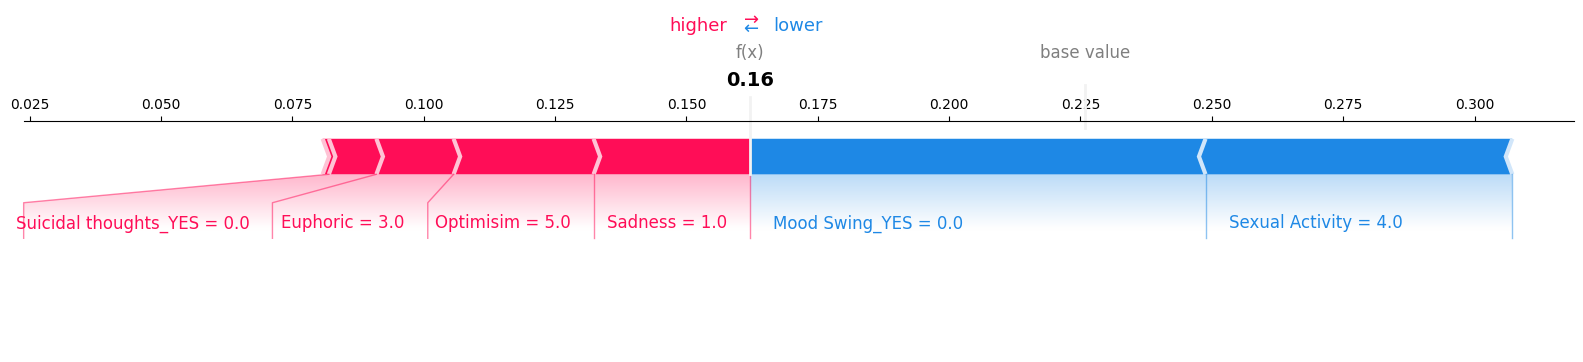

In [64]:
shap.initjs()  # Initialize JS visualization (though you're using matplotlib=True)

# For binary classification (most common SVM case)
shap.force_plot(
    explainer.expected_value[0],  # Base value (average prediction)
    shap_values[20, :, 0],       # SHAP values for sample 20, class 0
    X_test1[top_features].iloc[20],             # Feature values for this sample
    matplotlib=True              # Render with matplotlib instead of JS
)


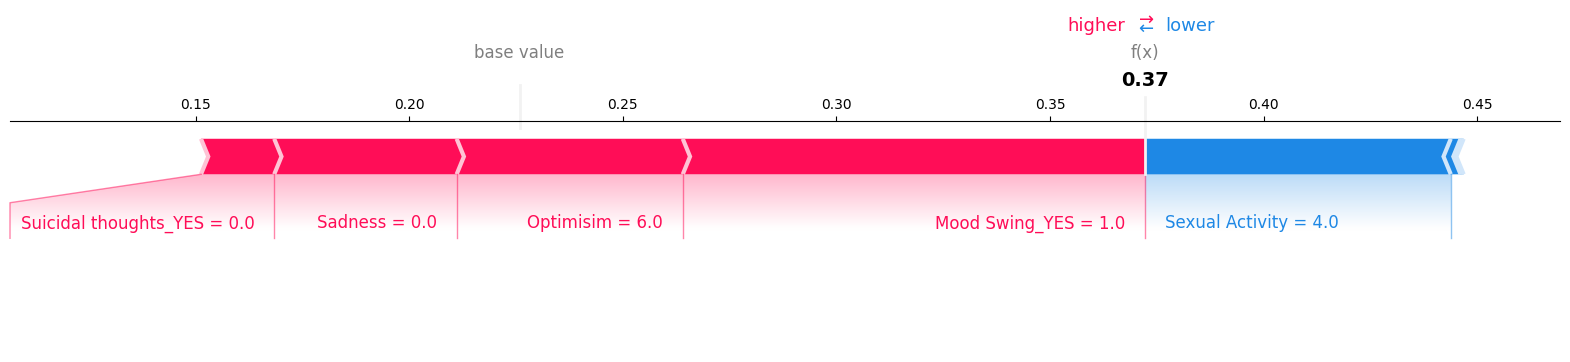

In [65]:
shap.initjs()  # Initialize JS visualization (though you're using matplotlib=True)

# For binary classification (most common SVM case)
shap.force_plot(
    explainer.expected_value[0],  # Base value (average prediction)
    shap_values[5, :, 0],       # SHAP values for sample 5, class 0
    X_test1[top_features].iloc[5],             # Feature values for this sample
    matplotlib=True              # Render with matplotlib instead of JS
)


In [69]:
y_test.iloc[3]

'Bipolar Type-2'

In [70]:
pred = rf_best.predict(X_test[top_features])
pred[3]

'Bipolar Type-2'